In [22]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import json

In [23]:
#data import
game_data = pd.read_csv('data/clean_data.csv')

In [24]:
genre_price = pd.DataFrame(game_data[["AppID", "Name", "Price", "Genres"]])

In [25]:
#generate table of genres

json_table = []
genre_price_json = genre_price.to_json(orient='records')
genre_price_json = json.loads(genre_price_json)

for j in genre_price_json:
    test = {}
    gens = j["Genres"]
    test["AppID"] = j["AppID"]
    test["Name"] = j["Name"]
    test["Price"] = j["Price"]
    
    if gens != None:
        gens = gens.split(",")
        for i in gens:
            test[i] = True
    
    json_table.append(test)

print(len(json_table))

16081


In [26]:
gen_price_table = pd.DataFrame(json_table)
print(gen_price_table.shape)
print(gen_price_table.columns.tolist())
gen_price_table.fillna(value=False, inplace=True)

gen_price_table.head()

(16081, 27)
['AppID', 'Name', 'Price', 'Adventure', 'Casual', 'Free to Play', 'Massively Multiplayer', 'RPG', 'Strategy', 'Action', 'Indie', 'Early Access', 'Racing', 'Simulation', 'Sports', 'Sexual Content', 'Violent', 'Nudity', 'Gore', 'Audio Production', 'Animation & Modeling', 'Design & Illustration', 'Video Production', 'Web Publishing', 'Movie', 'Education', 'Game Development']


,AppID,Name,Price,Adventure,Casual,Free to Play,Massively Multiplayer,RPG,Strategy,Action,...,Nudity,Gore,Audio Production,Animation & Modeling,Design & Illustration,Video Production,Web Publishing,Movie,Education,Game Development
0,1469160,Wartune Reborn,0.00,True,True,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
1,320150,Deadlings: Rotten Edition,3.99,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,1026420,WARSAW,23.99,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,485000,Cthulhu Realms,0.00,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,1454010,Diary of Lucie,12.99,True,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False


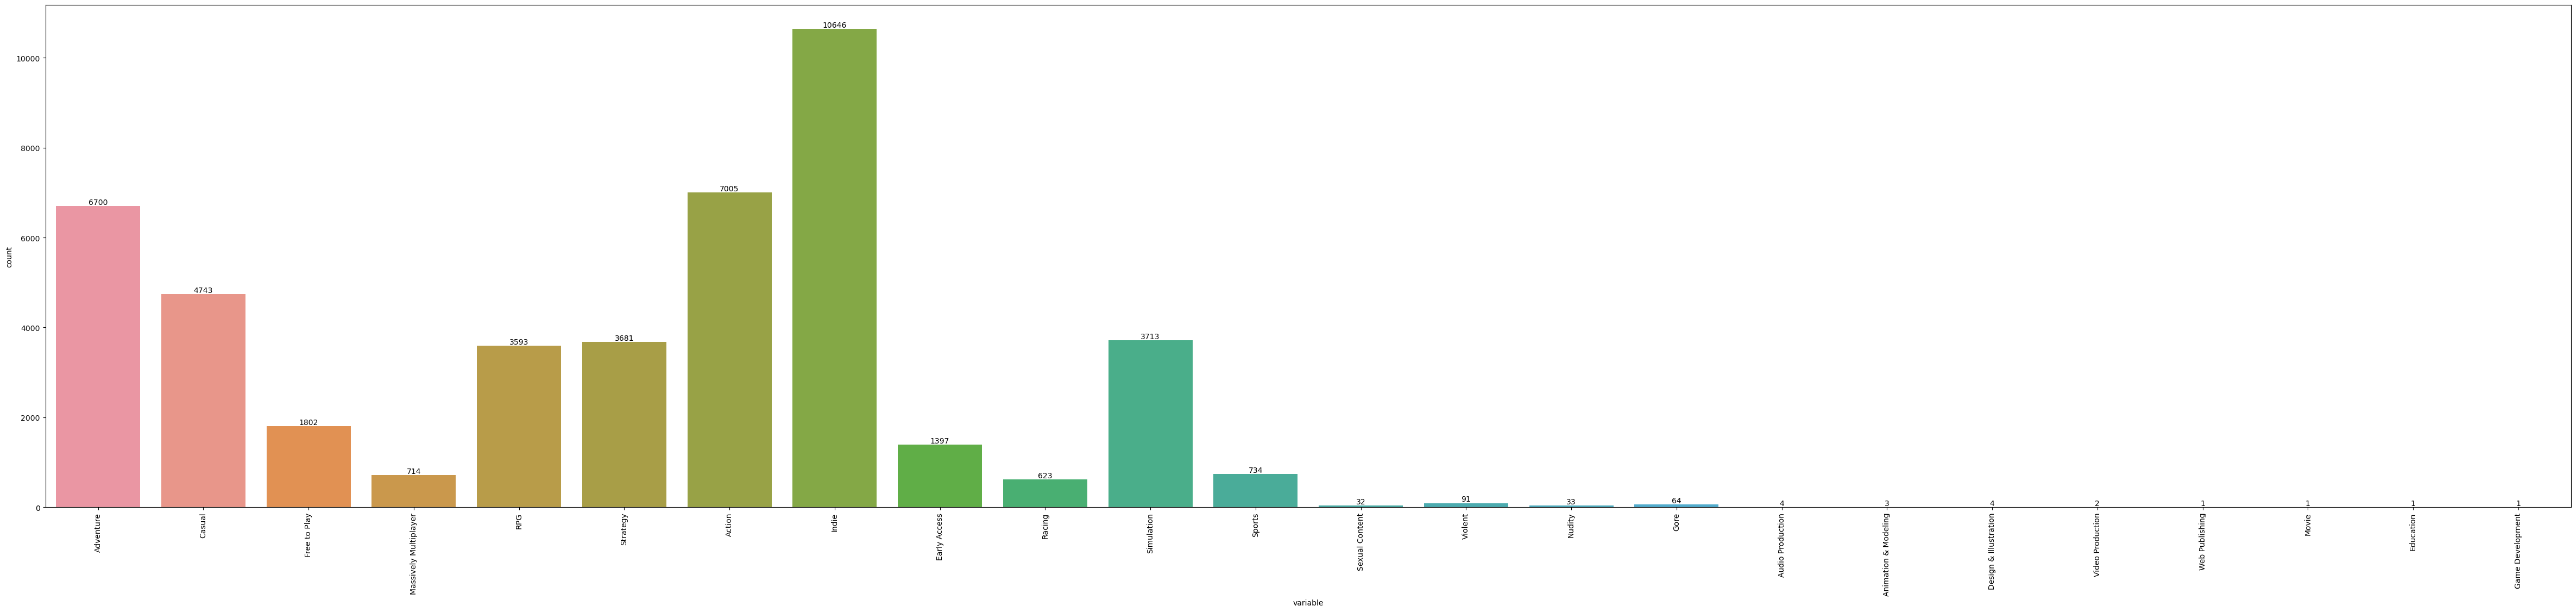

In [27]:
gen_table = gen_price_table.drop(columns =['Price', 'AppID', "Name"])

gen2 = gen_table.melt(value_vars=gen_table.columns)
gen2 = gen2[gen2["value"] != False]
f = plt.figure(figsize=(60, 12))

graph = sb.countplot(data=gen2, x="variable")
graph.bar_label(graph.containers[0])
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)

plt.show()


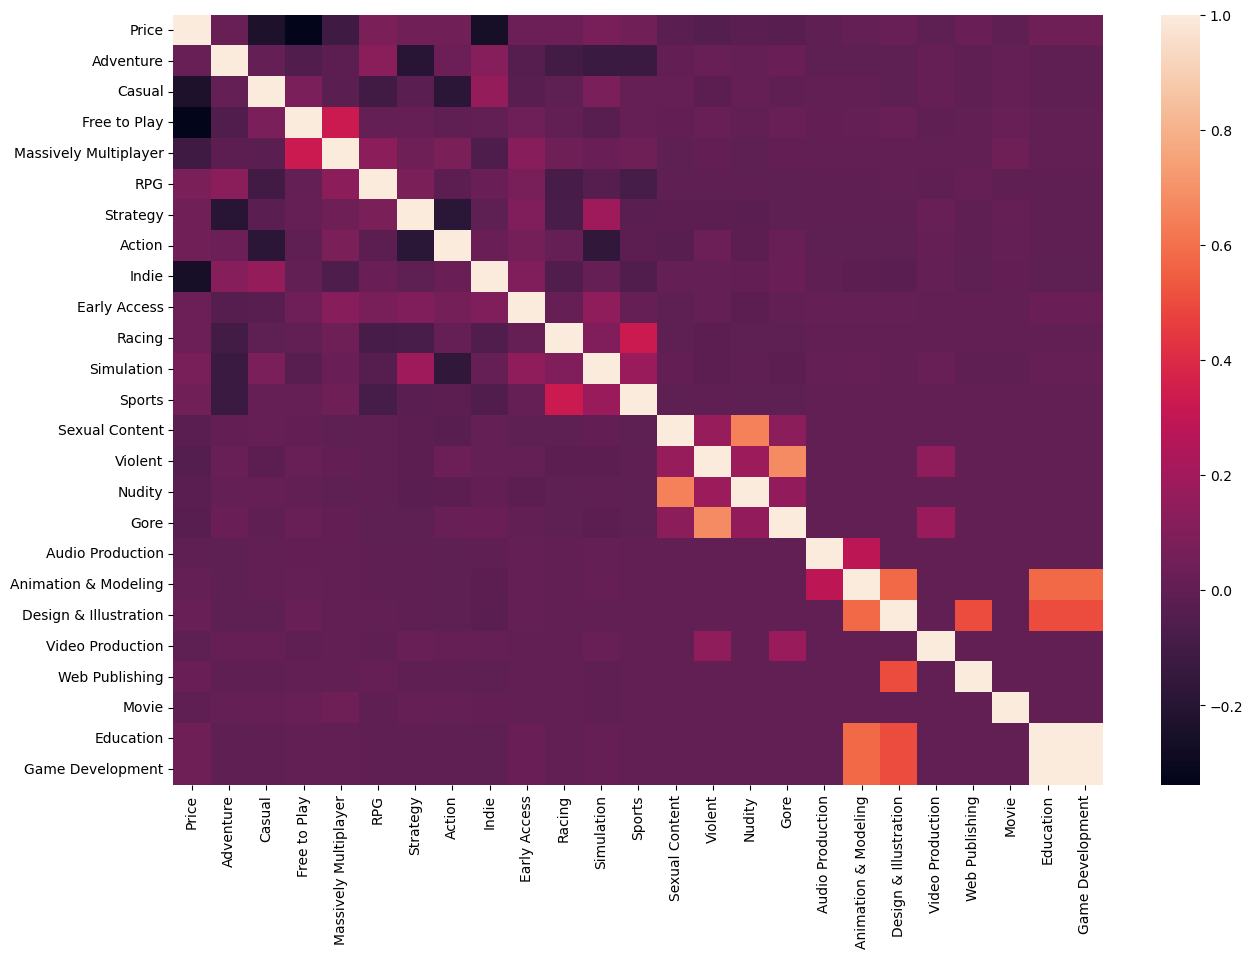

In [28]:
gen_price = gen_price_table.drop(columns =['AppID'])

plt.figure(figsize=(15,10))
sb.heatmap(data=gen_price.corr())
plt.show()

In [29]:
corr_table = gen_price.corr()["Price"]
corr_table.head()

Price                    1.000000
Adventure                0.017954
Casual                  -0.235655
Free to Play            -0.337988
Massively Multiplayer   -0.116306
Name: Price, dtype: float64

In [30]:
for index, row in corr_table.items():
    if(row > 0.1 or row < -0.1):
        print(index, " aa ", row)

Price  aa  1.0
Casual  aa  -0.23565504128932363
Free to Play  aa  -0.33798768043767213
Massively Multiplayer  aa  -0.11630561852999972
Indie  aa  -0.25754838017847126


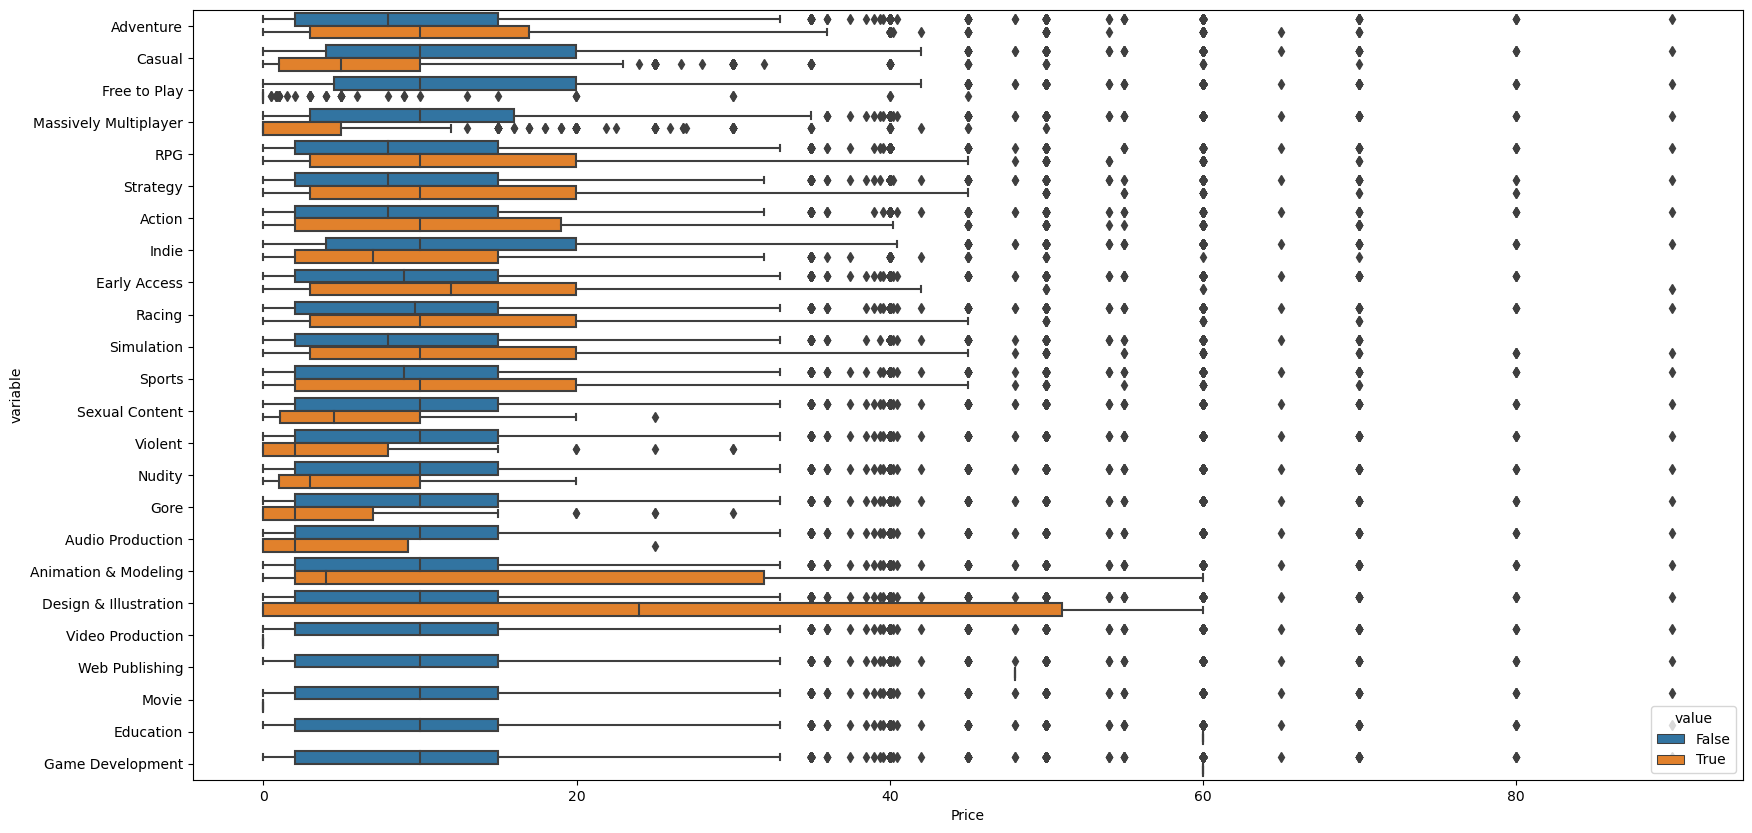

In [31]:
gen_table = gen_price_table.drop(columns =["Price", 'AppID', "Name"])
gen_table_melted = pd.melt(gen_price_table, id_vars=['Price'], value_vars=gen_table.columns)

plt.figure(figsize=(20,10))
sb.boxplot(x=gen_table_melted["Price"], y=gen_table_melted["variable"], hue=gen_table_melted["value"], orient="h")
plt.show()

correlations

In [32]:
# no_free = cat_price[cat_price.Price != 0]
corr_table = gen_price.corr()["Price"]
corr_table.head()

Price                    1.000000
Adventure                0.017954
Casual                  -0.235655
Free to Play            -0.337988
Massively Multiplayer   -0.116306
Name: Price, dtype: float64

In [33]:
for index, row in corr_table.items():
    if(row > 0.1 or row < -0.1):
        print(index, " aa ", row)

Price  aa  1.0
Casual  aa  -0.23565504128932363
Free to Play  aa  -0.33798768043767213
Massively Multiplayer  aa  -0.11630561852999972
Indie  aa  -0.25754838017847126


classification tree

In [34]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [35]:
#generate table of categories

json_table = []
a = genre_price.to_json(orient='records')
a = json.loads(a)

for j in a:
    test = {}
    cats = j["Genres"]
    test["AppID"] = j["AppID"]
    test["Name"] = j["Name"]
    test["Price"] = j["Price"]
    
    if cats != None:
        cats = cats.split(",")
        for i in cats:
            test[i] = 1

    json_table.append(test)

a = pd.DataFrame(json_table)
a.fillna(value=0, inplace=True)

a.head()

,AppID,Name,Price,Adventure,Casual,Free to Play,Massively Multiplayer,RPG,Strategy,Action,...,Nudity,Gore,Audio Production,Animation & Modeling,Design & Illustration,Video Production,Web Publishing,Movie,Education,Game Development
0,1469160,Wartune Reborn,0.00,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,320150,Deadlings: Rotten Edition,3.99,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1026420,WARSAW,23.99,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,485000,Cthulhu Realms,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1454010,Diary of Lucie,12.99,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
regr = RandomForestRegressor()
aaa = a.columns.tolist()
aaa = aaa[3:]
print(aaa)
print(len(aaa))


['Adventure', 'Casual', 'Free to Play', 'Massively Multiplayer', 'RPG', 'Strategy', 'Action', 'Indie', 'Early Access', 'Racing', 'Simulation', 'Sports', 'Sexual Content', 'Violent', 'Nudity', 'Gore', 'Audio Production', 'Animation & Modeling', 'Design & Illustration', 'Video Production', 'Web Publishing', 'Movie', 'Education', 'Game Development']
24


In [37]:
import collections
import math
import operator
import random
from itertools import chain, combinations

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(1, 3))

In [38]:
bbb = aaa
# print(len(bbb))
# trial = list(powerset(bbb))
# print(trial)
# print(len(trial))


In [39]:
mmax = 0
mmin = 1000
thing = ""
thing2 = ""
for index, row in corr_table.items():
    if(index == "Price"):
        continue
    if(row > mmax):
        mmax = row
        thing = index
    if(row < mmin):
        mmin = row
        thing2 = index
print("max: ",mmax," min ",mmin)
print(thing, thing2)

max:  0.08475970050303357  min  -0.33798768043767213
RPG Free to Play


In [40]:
# ccc = [thing]
# final = []
# mini = 0
# end = 0
# if(thing in bbb):
#     bbb.remove(thing)
# print(bbb)
# while bbb != []:
#     ccc.append(bbb[0])
#     print(ccc)
#     bbb = bbb[1:]
#     X = a[ccc]
#     Y = a["Price"]
#     regr.fit(X, Y)
#     testt = regr.predict(X)
#     mse = mean_squared_error(Y, testt)
#     score = regr.score(X, Y)
#     if(score >= mini):
#         mini = score
#         final = ccc
#         end = mse
    
#     print("score: ",score, " mse: ", mse)
    # print("", mse**(1/2))

In [41]:
# print(final)
# print(end**(1/2))
# mini

In [42]:
# for name, age in mydict.items():
#     if age == search_age:
#         print name


: 